<span style="color:red">Assignment Grade: 6.62</span>


P1 grade: 6

* Does it look like the least squares fittings are converging?
* Incorrect least squares coefficients

P2 grade: 10

* It looks like you are familiar with C programming.

P3 grade: 5.5
* In the line `root=mp.polyroots([2,-3*root[0],0,1])` you are only taking the first of three roots from the polynomial (-3)
* In the line `type(n)==type(z)` you are throwing away roots based on if they are complex or real. I don't see how this could be useful (-1)
* The colors on the scatter plot should reflect the number of iterations (-1/2)

P4 grade: 5

* Solution incorrect

Comments: 

* 


In [96]:
%matplotlib inline

## NOTE:
Libraries get imported in every cell so they can be run independently of previous cells if the kernel restarts

# Homework Assignment 2

Due February 14th at **10am**.  The pre-grading script should be up and running by Friday afternoon and will give you feedback in the **Task 5** item.  A note will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your **mp248** repo as **mp248/Assignment.2/Assignment.2.ipynb**. 


## P1: Quiz 2, extended. 

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a **dictionary**, $L$, where $L[k]$ is the number of times one needs to apply $f$ to turn $k$ into $1$, eg: $L[1]=0$, $L[2]=1$.

Consider the function $T(k) = L[1] + L[2] + \cdots + L[k]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for both (a) a linear and (b) a quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?   Plot the data together with the least-squares interpolation.  Provide a suitable title and legend -- include the coefficients of the least-squares fitting in the legend.

For the purposes of the pre-grading script, print out the values of $T(10)$, $T(100)$, $T(1000)$, $T(10000)$, and $T(100000)$. Put the values in a 5-element list, and print out that list.

**Note**: We will discuss least squares in the Monday Feb. 11th class.

In [239]:
## Plotting using the recursive function method
#######c############# Importing the necessary libraries:
import numpy as np
import sympy as sp
import collections as co
import matplotlib.pyplot as plt
########o############ Conjecture function definiton, nothing has changed here:
def f(n):
    if n%2==0:
        n=n//2
    else:
        n=3*n+1
    return n
##########L########### Defining T(n) as the sum of L[n]'s'
def T(k):
    Val=0
    for i in range(0,k+1):
        Val+=L[i]
    return Val

def fun(s,e):
    while (s<(e+1)):
        k=0
        q=s
        while q>=1:
            if q==1:
                break
            k+=1
            q=f(q)
        L[s]=k
        s+=1

In [261]:
## 100k iterations
L=co.defaultdict(int)
r=list(zip(range(0,99001,1000),range(1000,100001,1000)))
for s,e in r:
    fun(s,e)
# print(L)

In [273]:
T_li10=np.array([])
for n in range(10000):
    T_li10=np.append(T_li10,[T(n)])

In [274]:
A = np.matrix([[1.0, x, x**2] for x in range(10000)]).T
y = np.matrix(T_li10).T
c = np.linalg.inv(A*A.T)*A*y
bup=list(range(100000))

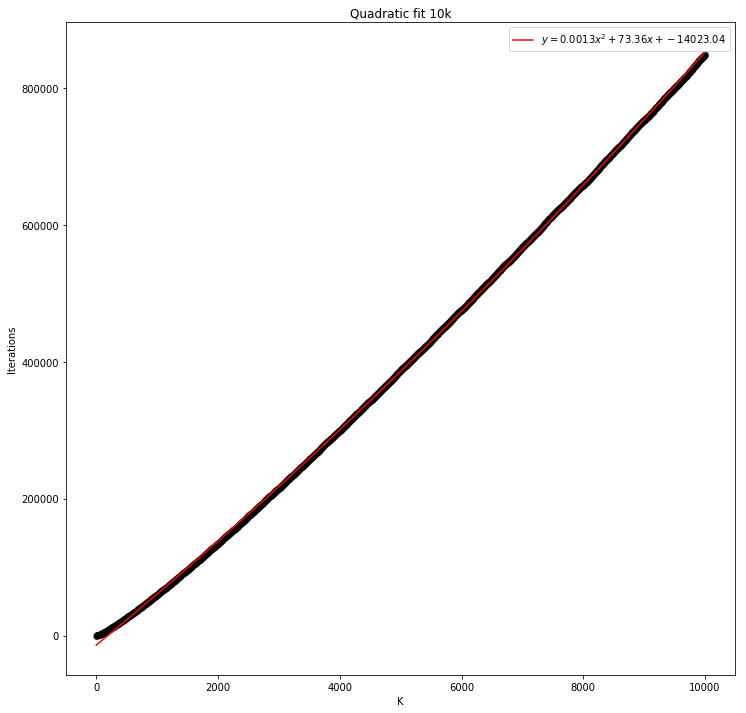

In [275]:
plt.figure(figsize=(12,12))
plt.title("Quadratic fit 10k")
plt.xlabel("K")
plt.ylabel("Iterations")
plt.scatter(bup[0:10000], T_li10, c='k', alpha=0.1)
dom = np.linspace(min(bup[0:10000]), max(bup[0:10000]), 1000)
ran = [c[0,0] + c[1,0]*x +c[2,0]*x**2 for x in dom]
plt.plot(dom, ran, 'r-', label='$y=%2.4fx^2+%2.2fx+%2.2f$' %(c[2,0],c[1,0],c[0,0]))
plt.legend()
plt.show()

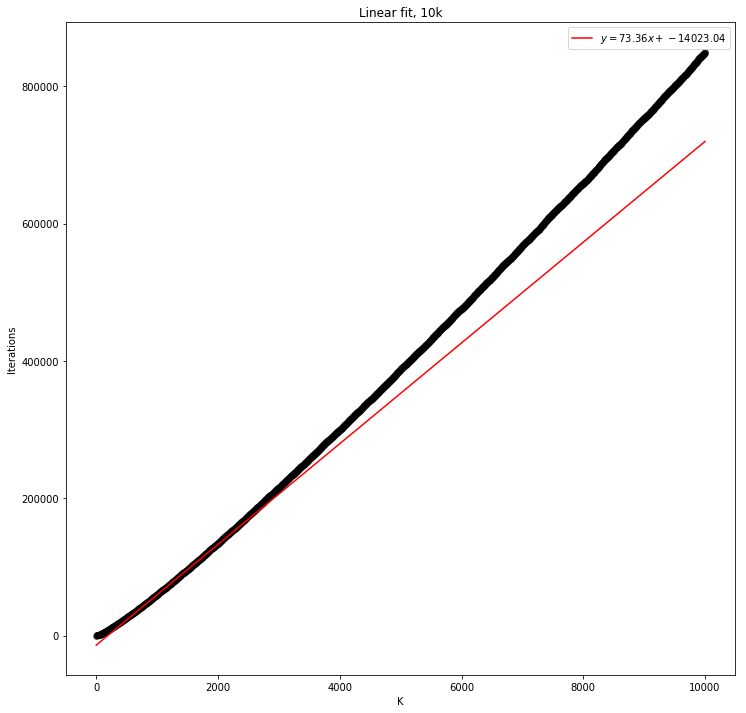

In [276]:
plt.figure(figsize=(12,12))
plt.title("Linear fit, 10k")
plt.xlabel("K")
plt.ylabel("Iterations")
plt.scatter(bup[0:10000], T_li10, c='k', alpha=0.1)
dom = np.linspace(min(bup[0:10000]), max(bup[0:10000]), 1000)
ran = [c[0,0] + c[1,0]*x for x in dom]
plt.plot(dom, ran, 'r-', label='$y=%2.2fx+%2.2f$' %(c[1,0],c[0,0]))
plt.legend()
plt.show()

In [277]:
A2 = np.matrix([[1.0, x, x**2] for x in range(10000)]).T
y2 = np.matrix(T_li10).T
c2 = np.linalg.inv(A2*A2.T)*A2*y2

100000 100000


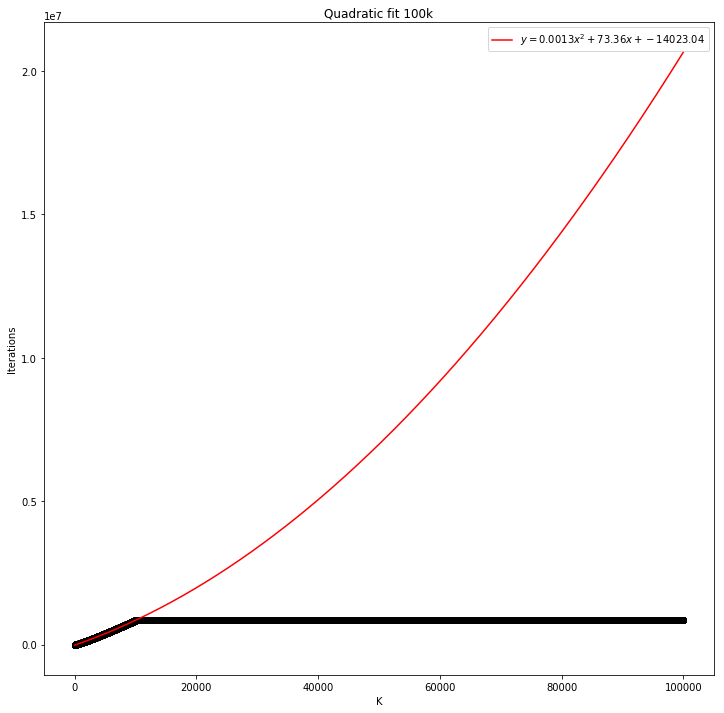

In [278]:
plt.figure(figsize=(12,12))
plt.title("Quadratic fit 100k")
plt.xlabel("K")
plt.ylabel("Iterations")
print(len(T_li100[0:100000]),len(bup))
plt.scatter(bup, T_li100[0:100000], c='k', alpha=0.1)

dom = np.linspace(min(bup[0:100000]), max(bup[0:100000]), 100000)
ran = [c2[0,0] + c2[1,0]*x +c2[2,0]*x**2 for x in dom]

plt.plot(dom, ran, 'r-', label='$y=%2.4fx^2+%2.2fx+%2.2f$' %(c2[2,0],c2[1,0],c2[0,0]))

plt.legend()
plt.show()

In [279]:
print(T(10))
print(T(100))
print(T(1000))
print(T(10000))
print(T(100000))
print(list1)

67
3142
59542
849666
10753840
[67, 3142, 59542, 849666, 10753840]


## P2 : Simple Equation Solver

While Newton's method is an excellent way to solve equations, in practice there is a more reliable way to solve equations, called the **subdivision method**. 

The heart of the subdivision method is the **intermediate value theorem** which states that if a function $f: [a,b] \to \mathbb R$ is *continuous* then for any $y_0$ between $f(a)$ and $f(b)$ (not equal to $f(a)$ or $f(b)$), there exists $t_0 \in (a,b)$ with $f(t_0) = y_0$. This theorem is the inspiration for:

**The Subdivision method** for solving $f(t)=0$. 

Given a continuous function $f : [a,b] \to \mathbb R$ with $f(a)$ and $f(b)$ having opposite signs (in particular, not zero), let $t_0$ be the *mid-point* of the interval $[a,b]$ i.e. $t_0 = \frac{a+b}{2}$.  We know by the intermediate value theorem that $f(t)=0$ has a solution in the interval.  Moreover, if $f(t_0)$ has the same sign as $f(b)$, then by the intermediate value theorem, a solution *must be* in the interval $[a,t_0]$.  Similarly, if $f(t_0)$ has the same sign as $f(a)$, a solution *must be* in the interval $[t_0,b]$. 

The *subdivision method* is to repeat this process of replacing the interval $[a,b]$ by either $[a,t_0]$ or $[t_0,b]$ until your interval is shorter than your acceptable error in approximation. 

**The problem** Write a Python function *subdiv(f,x,a,b,eps)* that takes as input a sympy function $f$ with variable $x$, with left endpoint $a$ and right endpoint $b$. *eps* is your acceptable amount of error.  The function subdiv will iterate the subdivision method until the interval containing a root is shorter than *eps*.  The function will return the endpoints of the interval, together with the number of iterations.  Find the root of $x^x-2$ in the interval $[1,2]$.  Set $eps = \frac{1}{10^k}$ for $k=1,2,3,4,5,6$, printing the output of *subdiv* in each case.

**Hint** When solving for the root of $x^x-2$, using endpoints $1.0$ and $2.0$ with *eps=0.5*, *subdiv* should take only one iteration. Using *eps=1.0* it should take zero.

In [209]:
#################### module importing ###########################

import sympy as sp

#################### End module importing #######################

#################### Begin Function Definitions #################
def subdiv(f,x,a,b,eps):
    '''
    subdiv(f,x,a,b,eps):
    ====================
    Using the subdivision method it finds the roots to a function (within given error).
    
    Input:
    ====================
    f: a sympy function
    x: the variable of interest in f
    a: the left endpoint
    b: the right endpoint
    eps: acceptable error
    
    Output:
    ====================
    return iterations, left endpoint, right endpoint
    '''
    f = sp.lambdify(x,f)
    I=[a,b]
    k=0
    while (I[-1]-I[0])>(eps):
        a=I[0];b=I[-1];t=(I[0]+I[-1])/2
        if np.sign(f(a))==np.sign(f(t)):
#             print(np.sign(f(a)),np.sign(t_0))
            I=[t,b]
        else:
            I=[a,t]
        k+=1
    return (I[0],I[-1],k)
################### End Function Definition ####################

################### Begin main function ########################
def main():
    x=sp.Symbol('x')
    f = (x**x)-2
    a=1;b=2
    t=(a+b)/2
    for k in range(1,7):
        a=1;b=2
        eps=1/(10**k)
        print(subdiv(f,x,a,b,eps))
main()

#################### End Main definition #######################

(1.5, 1.5625, 4)
(1.5546875, 1.5625, 7)
(1.5595703125, 1.560546875, 10)
(1.5595703125, 1.55963134765625, 14)
(1.5596084594726562, 1.5596160888671875, 17)
(1.559610366821289, 1.5596113204956055, 20)


## P3: Extended Newton method example.

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find the points in the plane where Newton's method eventually fails, i.e. find all the initial 
conditions $z_0$ such that $N^{(k)}(z_0) = 0$ for some $k$.  Clearly, Newton's method fails for $z_0 = 0$, with $k=0$, i.e. it fails immediately.  We say Newton's method fails in one step if $N^{(1)}(z_0) = 0$, and two steps if $N^{(2)}(z_0)=0$, etc. 

Plot the points where Newton's method fails in $k$ steps for $k=0,1,2,3,4,\cdots, 10$.  Use a different color for each $k$. 

We denote the set where Newton's method fails in $k$ steps by $F_k$. 

$$F_0 = \{0\}$$

and

$$F_k = \{ z_0 : N(z_0) = \frac{2z_0^3+1}{3z_0^2} \in F_{k-1} \}$$

Thus, provided we know $F_{k-1}$ we can solve for $F_k$, as the solution set to the equation


$$F_k = \{ z_0 : 2z_0^3-3f_{k-1}z_0^2+1 = 0, f_{k-1} \in F_{k-1} \}$$

We can solve this equation exactly in closed form using Sympy -- you will likely find this slow. 

More pragmatically, we can solve it using complex floats with the [*mpmath*](http://mpmath.org/doc/current/calculus/polynomials.html) library. 

**Advice** Please use a careful choice of *markersize* in your point plot so that you can see the underlying shape of the scatter plot. i.e. try to avoid big points crowding each other out. Also set *figsize* to (12,12), to ensure your plot is reasonably large.

**Advice** Choose your *xlim* and *ylim* so that your image $x$ and $y$ coordinates vary between $-2$ and $2$. As you will see, there *are* solutions outside of this square, but they are rather rare, and having them in the plot wrecks the scale.

Use **%matplotlib inline** to ensure your plots are saved in your notebook.  

In [210]:
%matplotlib inline

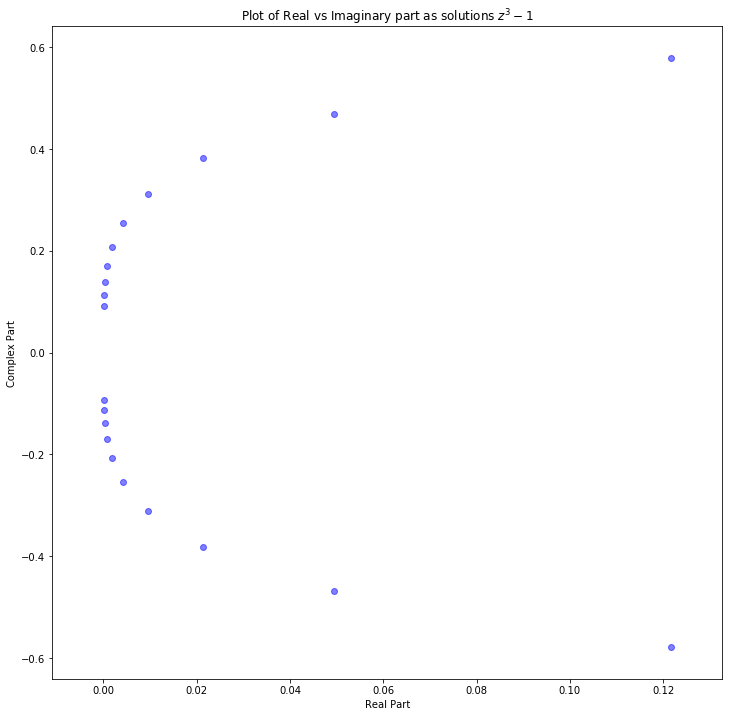

In [413]:
import mpmath as mp
import matplotlib.pyplot as plt
root=[];soln=[];complex_sol=[];x=[];y=[]
root=mp.polyroots([2,0,0,1])
for _ in range(1,11):
    root=mp.polyroots([2,-3*root[0],0,1])
    for n in root:
        soln.append(n)
for n in soln:
    z=soln[1]
    if type(n)==type(z):
        complex_sol.append(n)
# mp.nprint(complex_sol)
for n in range(len(complex_sol)):
    x.append(complex_sol[n].real)
    y.append(complex_sol[n].imag)
plt.figure(figsize=(12,12))
plt.xlabel('Real Part')
plt.ylabel('Complex Part')
plt.title('Plot of Real vs Imaginary part as solutions $z^3-1$')
from itertools import cycle
cycol = cycle('bgrcmk')

plt.scatter(x,y,alpha=0.5,c=next(cycol))
plt.show()

In [288]:
import sympy as sp
import numpy as np
mpmath
def Newt(f, z, z0,q):
    try:
        F = sp.lambdify(z, f)
        N = sp.lambdify(z,z - f/f.diff(z))
        if N(z0)!=0 and q<=10:
            q+=1
#             sp.pprint(N(z))
            q=Newt(f,z,N(z0),q)
        return q
    except:
        return 0
def main():
    z=sp.Symbol("z")
    f=z**3-1
    z0=2
    for i in np.linspace(-2,2,1000):
        z0=i
        q=Newt(f,z,z0,0)
        if q==11:
            pass
        else:
            print(q)
main()

## P4: Doubling roots

Recall our *doubling function* $f$ from the start of the Sympy notebook (7).   One way to express it is via the floor function $\lfloor x \rfloor$ 

$$f(x) = 2x - \lfloor 2x \rfloor.$$

The floor function $\lfloor x \rfloor$ is the largest integer $k$ with $k \leq x$.  

Using Python and the Sympy library, compute the iterates $f^{(k)}(\sqrt{2})$ for $k=0,1,2,\cdots, 1000$.  By iterates we mean 
$$f^{(0)}(\sqrt{2}) = \sqrt{2}$$
$$f^{(1)}(\sqrt{2}) = f(\sqrt{2})$$
$$f^{(2)}(\sqrt{2}) = f(f(\sqrt{2}))$$ 
$$f^{(3)}(\sqrt{2}) = f(f(f(\sqrt{2})))$$

Verify that $f^{(i)}(\sqrt{2}) \neq f^{(j)}(\sqrt{2})$ if and only if $i = j$.

Using the sort function (**sorted**) linearize the iterates, i.e. compute a sequence $j_0, j_1, \cdots, j_{1000}$ such that

$$f^{(j_0)}(\sqrt{2}) < f^{(j_1)}(\sqrt{2}) < \cdots < f^{(j_{1000})}(\sqrt{2}).$$

Store the sequence $J = \left[j_0, j_1, \cdots, j_{1000}\right]$ as a list, and print it.

**Note**: If Sympy's implementation of the inequality $<$ fails you, perhaps work around it creatively using *evalf*. 

If you have trouble answering this question for **1000** iterations, as asked, you will get partial credit for a correct answer for **200**, **400**, **600** or **800** iterations, respectively.  You will receive more partial credit the closer you are to **1000** points. But please do not answer this question for any other number of iterations as the pre-grading script will not look for that answer.   As a sanity check, note that any answer to this problem for **1000** iterations should be a list with **1001** elements.

In [1]:
import sympy as sp
import collections as co
import operator as op

x = sp.Symbol('x')
f = 2*x-2*sp.floor(x)
F = sp.lambdify(x,f)
x = sp.sqrt(2)
X = x.evalf(256+64)
Xdic = co.defaultdict(int)
i = 0
while i<=1000:
    Xdic[i+1] = X
    i += 1
    X = F(X)
sorte_x = []
for e in sorted(Xdic.items(), key=op.itemgetter(1)):
    sorte_x.append(e[0])
# print(Xdic)
print(sorte_x)

[604, 454, 605, 455, 524, 606, 456, 525, 997, 281, 980, 607, 457, 9, 712, 585, 526, 148, 950, 274, 226, 930, 362, 920, 998, 282, 981, 686, 58, 608, 458, 182, 886, 10, 713, 547, 218, 586, 527, 149, 951, 406, 275, 859, 227, 623, 931, 466, 419, 538, 315, 287, 363, 385, 921, 520, 999, 682, 283, 982, 687, 59, 669, 609, 913, 459, 162, 986, 183, 82, 887, 751, 496, 11, 302, 790, 698, 249, 714, 548, 219, 308, 691, 326, 63, 587, 673, 528, 150, 802, 952, 407, 201, 736, 599, 276, 707, 860, 228, 624, 760, 852, 510, 771, 932, 613, 653, 796, 727, 467, 420, 539, 316, 288, 129, 431, 364, 386, 480, 922, 869, 561, 333, 521, 1000, 994, 271, 359, 917, 683, 55, 883, 215, 463, 416, 284, 382, 517, 666, 983, 246, 688, 60, 670, 733, 704, 610, 914, 52, 460, 663, 163, 972, 987, 184, 83, 888, 752, 497, 166, 12, 975, 303, 791, 699, 576, 443, 399, 841, 250, 643, 715, 549, 107, 259, 944, 220, 309, 692, 327, 835, 64, 588, 674, 529, 151, 803, 953, 905, 408, 202, 737, 70, 600, 277, 708, 581, 848, 865, 990, 242, 48, 831,

In [2]:
import operator as op
import sympy as sp

## flexible version of the Collatz iterator
def f(x, dec=20):
    x = 2*x
    while x.evalf(dec)>=1:
        x -= 1
    while x.evalf(dec)<0:
        x += 1
    return(x)

def printANS(n, dec=20):
    S=[sp.sqrt(2)]
    for i in range(n):
        S.append(f(S[-1], dec))

    Sc = [(S[i].evalf(dec), i) for i in range(len(S))]
    Sx = sorted(Sc, key=op.itemgetter(0)) 
    #print("Ans for n==",n, "dec==",dec)
    #print([x[2] for x in Sx])
    print([Sx[i][1] for i in range(10)])
    return [x[1] for x in Sx]
    
res200=printANS(200, 20)
res1000=printANS(1000, 120)

correct = 0
for i in range(len(res200)):
    if res200[i] == res200[i]:
        correct += 1
print("Out of 201, the student got ",correct," correct")
correct = 0
for i in range(len(res1000)):
    if res1000[i] == sorte_x[i]:
        correct += 1
print("Out of 1001, the student got ",correct," correct")        

[7, 146, 56, 180, 8, 147, 57, 160, 181, 80]
[602, 452, 603, 453, 522, 604, 454, 523, 279, 605]
Out of 201, the student got  201  correct
Out of 1001, the student got  0  correct
